In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

## Load minimization dict

In [3]:
pickle_path = \
    '/Users/imaliyov/run/potential-perturbation/INVERSE-DESIGN/WBe_Inter/minim_output/minim_dict.pkl'

with open(pickle_path, 'rb') as f:
    minim_dict = pickle.load(f)

## Minimization stats

In [4]:
iter_max = max(list(minim_dict['iter'].keys()))
print(f'{iter_max = }')
iter_array = np.arange(1, iter_max + 1)
error_array = np.array([ minim_dict['iter'][i]['error'] for i in iter_array ])

largest_dX_array = np.array([ np.max(np.abs(minim_dict['iter'][i]['dX'])) for i in iter_array ])
stddev_dX_array = np.array([ np.std(np.abs(minim_dict['iter'][i]['dX'])) for i in iter_array ])
mean_dX_array = np.array([ np.mean(np.abs(minim_dict['iter'][i]['dX'])) for i in iter_array ])

largest_dX_target_array = np.array([ np.max(np.abs(minim_dict['iter'][i]['dX_target'])) for i in iter_array ])
stddev_dX_target_array = np.array([ np.std(minim_dict['iter'][i]['dX_target']) for i in iter_array ])
mean_dX_target_array = np.array([ np.mean(minim_dict['iter'][i]['dX_target']) for i in iter_array ])

step_array = np.array([ minim_dict['iter'][i]['step'] for i in iter_array ])

dX_target_first = minim_dict['iter'][1]['dX_target']
dX_target_last = minim_dict['iter'][iter_max]['dX_target']

iter_max = 20


## Plot the stats

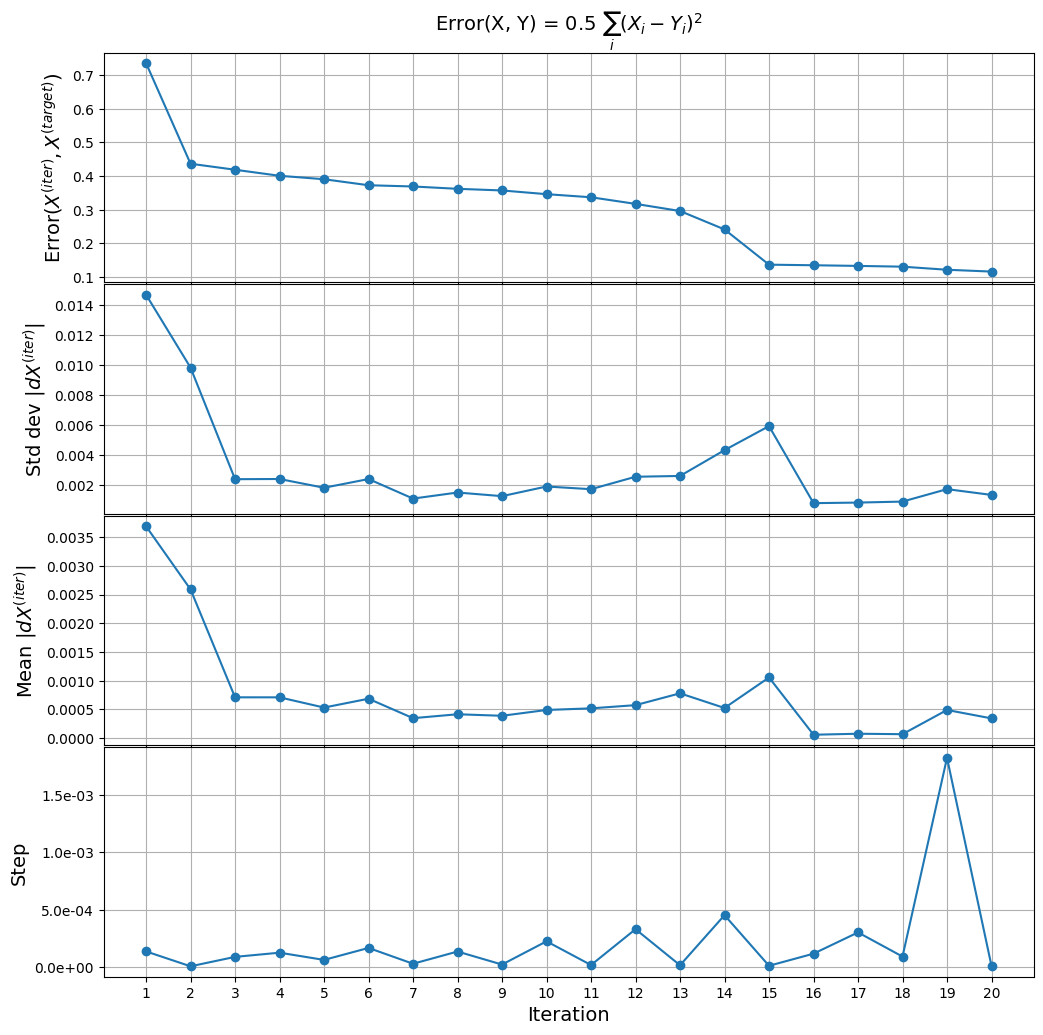

In [5]:
nplot = 4

fig, axes = plt.subplots(nplot, 1, figsize=(12, 3 * nplot), sharex=True)
plt.subplots_adjust(hspace=0.01)

fsize=14
axes[0].plot(iter_array, error_array, 'o-')
# 0.5 * (coord_diff(min_image_func, X1, X2)**2).sum()
axes[0].set_title(r'Error(X, Y) = 0.5 $\sum_{i} \left( X_{i} - Y_{i} \right)^2$', fontsize=fsize)
axes[0].set_ylabel(r'Error$(X^{(iter)}, X^{(target)})$', fontsize=fsize)

# std dev
axes[1].plot(iter_array, stddev_dX_array, 'o-')
axes[1].set_ylabel(r'Std dev $|dX^{(iter)}|$', fontsize=fsize)

# mean
axes[2].plot(iter_array, mean_dX_array, 'o-')
axes[2].set_ylabel(r'Mean $|dX^{(iter)}|$', fontsize=fsize)

axes[3].plot(iter_array, step_array, 'o-')
axes[3].set_ylabel(r'Step', fontsize=fsize)
axes[3].yaxis.set_major_formatter(plt.FormatStrFormatter('%.1e'))

for ax in axes:
    # set major grid lines to 1
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))
    ax.grid()

axes[-1].set_xlabel('Iteration', fontsize=fsize)

plt.show()